# A/A Test Food Products

## Extract Data Analysis


### Initialize Libraries

In [1]:
import pandas as pd #dataframes
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

### Load data

In [2]:
df = pd.read_csv("datasets/logs_exp_us.csv", sep='\t')

In [3]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


It's identified that the titles are not in a format consistent with best practices. Additionally, there are no null values. Duplicates will be checked, and the Dtype of expID will be changed to object, as will deviceidhash. As for eventtimestamp, it will be converted to date format.

### Correct and clean

In [5]:
old_columns = df.columns
new_columns=[]

for column in old_columns:
    lower = column.lower()
    strip =lower.strip()
    new_columns.append(strip)
    
df.columns = new_columns

df.head()

,eventname,deviceidhash,eventtimestamp,expid
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [6]:
df[df.duplicated()].head()

,eventname,deviceidhash,eventtimestamp,expid
453,MainScreenAppear,5613408041324010552,1564474784,248
2350,CartScreenAppear,1694940645335807244,1564609899,248
3573,MainScreenAppear,434103746454591587,1564628377,248
4076,MainScreenAppear,3761373764179762633,1564631266,247
4803,MainScreenAppear,2835328739789306622,1564634641,248


 413 duplicate entries were found and will be removed.

In [7]:
df_clean =  df.drop_duplicates().reset_index()
df_clean.duplicated().sum()

np.int64(0)

In [8]:
df_clean['eventtimestamp'] = pd.to_datetime(df_clean['eventtimestamp'],unit='s')
df_clean['date'] = df_clean['eventtimestamp'].dt.date
df_clean['hour'] = df_clean['eventtimestamp'].dt.hour

df_clean['date'] = pd.to_datetime(df_clean['date'])


df_clean.head()

,index,eventname,deviceidhash,eventtimestamp,expid,date,hour
0,0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,4
1,1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11
2,2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11
3,3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11
4,4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11


It's found that the original unit of the data is in seconds; the change will proceed before generating the new date and time columns

In [9]:
df_clean['deviceidhash'] = df_clean['deviceidhash'].astype('object')
df_clean['expid'] = df_clean['expid'].astype('object')

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           243713 non-null  int64         
 1   eventname       243713 non-null  object        
 2   deviceidhash    243713 non-null  object        
 3   eventtimestamp  243713 non-null  datetime64[ns]
 4   expid           243713 non-null  object        
 5   date            243713 non-null  datetime64[ns]
 6   hour            243713 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 12.1+ MB


## Study and verify the data

### How many events in a record?

In [11]:
print(f"The total number of event recorded is: {df_clean['eventname'].count().round(0)}.")

The total number of event recorded is: 243713.


### How many users are in the records?

In [12]:
print(f"The total number of users recorded is: {df_clean['deviceidhash'].nunique()}.")

The total number of users recorded is: 7551.


### What's the Average Number of events per user?



In [13]:
user_events = df_clean.groupby('deviceidhash').agg({'eventname':'count'})
user_events.columns=['Number_events_per_user']

print (f"Average of events per each user is :{user_events['Number_events_per_user'].mean().round(0)} events")

Average of events per each user is :32.0 events


### What Time Period Do the Data Cover? 

In [14]:
print(f" The first date is : {df_clean['date'].min()}")
print(f" The last date is : {df_clean['date'].max()}")
print(f" The test duration in days is:{df_clean['date'].max()-df_clean['date'].min()}")


 The first date is : 2019-07-25 00:00:00
 The last date is : 2019-08-07 00:00:00
 The test duration in days is:13 days 00:00:00


### Plot and histogram per hour and date 

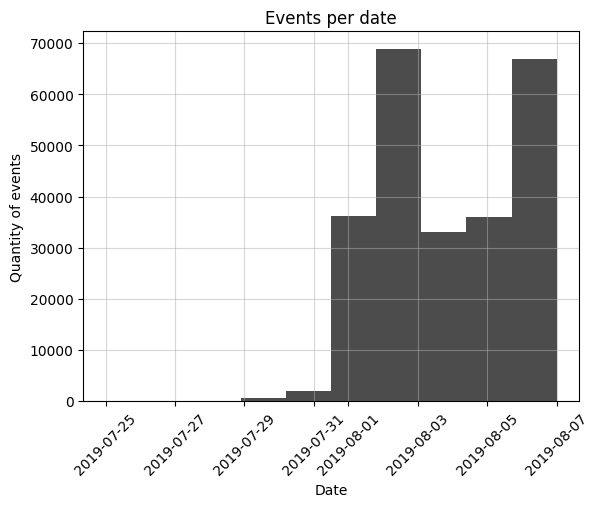

In [15]:
plt.hist(df_clean['date'], bins=10, color='black', alpha=0.7)
plt.title('Events per date')
plt.xlabel('Date')
plt.ylabel('Quantity of events')
plt.xticks(rotation=45)
plt.grid(True , alpha=0.5)
plt.show()


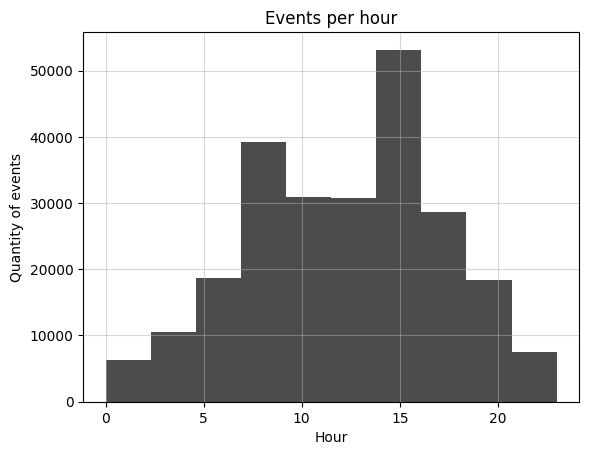

In [16]:
plt.hist(df_clean['hour'], bins=10, color='black', alpha=0.7)
plt.grid(True , alpha=0.5)
plt.title('Events per hour')
plt.xlabel('Hour')
plt.ylabel('Quantity of events')
plt.show()

It's found that the periods up to July 31, 2019, are not representative enough and could generate deviations, especially when averaging daily data. Therefore, these periods will be disregarded from this point onwards. As for the hourly distribution, it's normal as it covers the times when most people are awake.

In [17]:

empty_date = pd.to_datetime("2019-07-31")
df_cleanf = df_clean[df_clean['date']> empty_date]
df_cleanf.head(5)


,index,eventname,deviceidhash,eventtimestamp,expid,date,hour
2826,2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,0
2827,2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,0
2828,2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,0
2829,2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,0
2830,2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,0


The table is filtered, keeping only the representative dates found in the histogram.

###  What Period Do the Data Actually Represent?

In [18]:
print(f" The first date is: {df_cleanf['date'].min()}")
print(f" The final date is: {df_cleanf['date'].max()}")
print(f" The test duration in days is: {df_cleanf['date'].max()-df_cleanf['date'].min()}")

 The first date is: 2019-08-01 00:00:00
 The final date is: 2019-08-07 00:00:00
 The test duration in days is: 6 days 00:00:00


Seven days that weren't truly representative and could cause errors in the analysis were removed.

### A significant number of events and users are lost when excluding the older data.



In [19]:
print(f" The total number of events recorded before filtering is:{df_clean['eventname'].count().round(2)}")
print(f" The total number of events recorded after filtering is:{df_cleanf['eventname'].count().round(2)}")
print(f" In total, {df_clean['eventname'].count().round(2)-df_cleanf['eventname'].count().round(2)} events were discarded")
print(f" This means :{(-(df_cleanf['eventname'].count().round(2)/df_clean['eventname'].count().round(2)-1)*100).round(2)} % of the events were discarded.")

 The total number of events recorded before filtering is:243713
 The total number of events recorded after filtering is:240887
 In total, 2826 events were discarded
 This means :1.16 % of the events were discarded.


In [20]:
print(f" El número total de usuarios registrados sin filtrar es de :{df_clean['deviceidhash'].nunique()}")
print(f" El número total de usuarios registrados ya filtrados es de :{df_cleanf['deviceidhash'].nunique()}")
print(f" En total se perdieron un total de {df_clean['deviceidhash'].nunique()-df_cleanf['deviceidhash'].nunique()} usuarios")
print(f" Osea el :{(-(df_cleanf['deviceidhash'].nunique()/df_clean['deviceidhash'].nunique()-1)*100)}  % de los usuarios fueron descartados")

 El número total de usuarios registrados sin filtrar es de :7551
 El número total de usuarios registrados ya filtrados es de :7534
 En total se perdieron un total de 17 usuarios
 Osea el :0.22513574361011646  % de los usuarios fueron descartados


### Asegúrate de tener usuarios de los tres grupos experimentales.

In [21]:
df_cleanf['expid'].unique() 

array([246, 247, 248], dtype=object)

Efectivamente siguen los tres grupos con el dataframe ya filtrado.

## Estudiar el embudo de eventos

### Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [22]:
df_cleanf.head(5)

,index,eventname,deviceidhash,eventtimestamp,expid,date,hour
2826,2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,0
2827,2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,0
2828,2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,0
2829,2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,0
2830,2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,0


In [23]:
eventos_frecuencia2 = df_cleanf.groupby('eventname')['eventname'].count()
eventos_frecuencia2.sort_values(ascending=False)


eventname
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: eventname, dtype: int64

### Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [24]:
eventos_frecuencia = df_cleanf.groupby('eventname').agg({'deviceidhash':'count'}).reset_index()
eventos_frecuencia.columns=['eventname','frequency']
eventos_frecuencia = eventos_frecuencia.sort_values('frequency',ascending=False)
eventos_frecuencia

,eventname,frequency
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


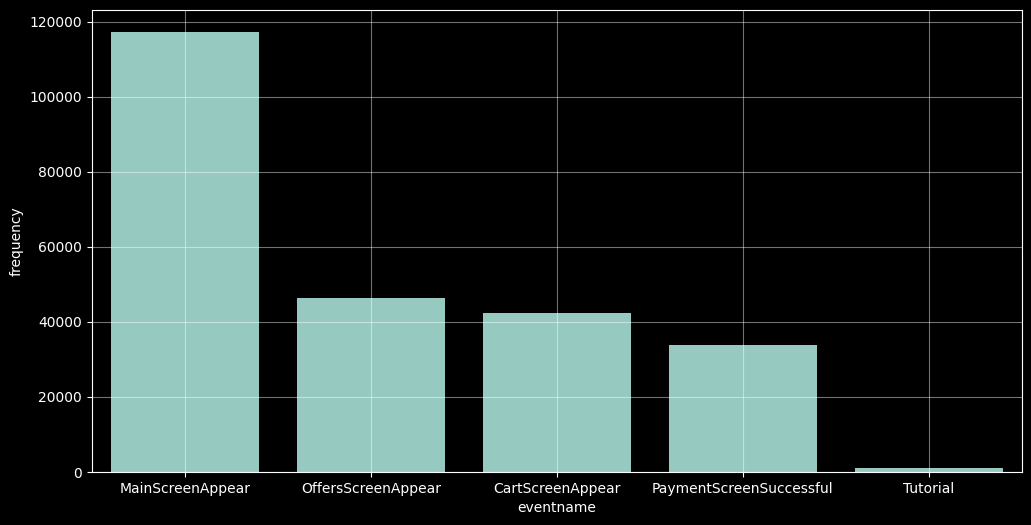

In [25]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))
sns.barplot(x='eventname',y='frequency',data=eventos_frecuencia)
plt.grid(True,alpha=0.45)

### ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

In [26]:
sucesos = eventos_frecuencia['eventname']
sucesos.columns=['orden','eventname']

Este es el orden de los sucesos :
- 1 MainScreenAppear 
- 2 OffersScreenAppear 
- 3 CartScreenAppear 
- 4 PaymentScreenSuccessful
- 5 Tutorial

Son una sola secuencia lo cual aún no puedo determinar es la funcion de tutorial puede que sea como preparar los productos , pero el resto tiene orden logico.

### Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

In [27]:
eventos_frecuencia

,eventname,frequency
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


In [28]:
max_frecuencia = eventos_frecuencia['frecuencia'].max()
eventos_frecuencia['conversion'] = ((eventos_frecuencia['frecuencia'] / max_frecuencia)*100).round(2).astype(str) + '%'
eventos_frecuencia

KeyError: 'frecuencia'

In [ ]:
conversion_siguiente = []
for i in range(len(eventos_frecuencia) - 1):
    frecuencia_actual = eventos_frecuencia['frecuencia'].iloc[i]
    frecuencia_siguiente = eventos_frecuencia['frecuencia'].iloc[i+1]
    if frecuencia_actual > 0:
        conversion = (frecuencia_siguiente / frecuencia_actual) * 100
        conversion_siguiente.append(f'{conversion:.2f}%')
    else:
        conversion_siguiente.append('0.00%') 

conversion_siguiente.append('N/A')

eventos_frecuencia['conversion_siguiente_etapa'] = conversion_siguiente
eventos_frecuencia

Se identifica que la cantidad de clientes que pasan de la etapa 1 a la etapa 2 es de tan solo el 39.49% , en cambio una vez el cleinte ve los descuentos procede a agregar cosas al carrito en un 91.3%  y de este 91% pasan a la etapa mas importante que es la del pago un total del 80.12% lo cual es un rate muy alto , se encuentra que una vez el cliente ve los descuentos lo mas probable es que realice una compra por lo cual se recomienda que sean mas visibles el tema de las ofertas en el banner principal, o si hay la posibilidad que los clientes entren directamente a los descuentos , por ultimo se descarta del analisis los clientes que van a ver el tutorial ya que esto no es realmente valioso.

### ¿En qué etapa pierdes más usuarios?

numericamente en la ultima etapa entre el evento 3 y 4 ya que pierdo alrededor del 97% de los usuarios pero se descarta esto ya que no tiene valor de los datos representativos , la perdida realmente importante se da entre la etapa 1 y la etapa 2 , con un 61% de perdidas de clientes aporximadamente.

### ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [ ]:
pago =  eventos_frecuencia['frecuencia'][eventos_frecuencia['eventname']=='PaymentScreenSuccessful']

In [ ]:
print(((pago/eventos_frecuencia['frecuencia'].max())*100).round(2))

Solo el 28.91% de nuestros clientes realizan todo el proceso.

## Estudiar los resultados del experimento 

### ¿Cuántos usuarios hay en cada grupo?

In [ ]:
user_group = df_cleanf.groupby('expid').agg({'deviceidhash':'nunique'}).reset_index()
user_group

hacer A/A sobre 246 y 247 que son los grupos d econtrol, puede o no haber una dif significativa , si no la hay uso alguno para hacer A/B para el 248 y alguno de los dos anteriores.

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=user_group['expid'], y=user_group['deviceidhash'], palette='viridis')
plt.title('Users per experiment group')
plt.xlabel('Experiment Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.5)
plt.show()

Tienen cantidades bastante similares.

### Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.


In [ ]:
visitantes_en_ambos = df_cleanf.groupby('deviceidhash').agg({'expid':'nunique'})
visitantes_en_ambos = visitantes_en_ambos[visitantes_en_ambos['expid']>1]
visitantes_en_ambos = visitantes_en_ambos.index
visitantes_en_ambos


In [ ]:
muestra_7_6 = df_cleanf[(df_cleanf['expid']==247)|(df_cleanf['expid']==246)]
muestra_7_6.sample(5)

In [ ]:
muestra_7_6.loc[muestra_7_6['eventname'] == 'PaymentScreenSuccessful', 'compra'] = 1
muestra_7_6.loc[muestra_7_6['eventname'] != 'PaymentScreenSuccessful', 'compra'] = 0

Ya tenemos el total de personas que hay en cada grupo vamos a ver cuantas de ellas llegaron hasta el evento de payment succesfull esa va a ser nuestra metrica el rate de compra.

In [ ]:
compradores_ = muestra_7_6.groupby('expid').agg({'compra':'sum','index':'count'}).reset_index()
compradores_.columns=['expid','cant_compradores','cant_inicio']
compradores_['rate %'] = ((compradores_['cant_compradores'] / compradores_['cant_inicio'])*100).round(2)
compradores_

Establecimos y calculamos el KPI o metrica que consideramos relevante. Encontramos que es mayor el rate usando la prueba 246

In [ ]:
comprador_246 = muestra_7_6[muestra_7_6['expid']==246]
comprador_246 =  comprador_246['compra']

comprador_247 = muestra_7_6[muestra_7_6['expid']==247]
comprador_247 =  comprador_247['compra']

In [ ]:
print("{0:.5f}".format(st.mannwhitneyu(comprador_246, comprador_247)[1]),"valor p")
print("{0:.3f}".format(comprador_246.mean()/comprador_247.mean()-1),"diferencia relativa")

The p-value is considerably less than 0.05, which leads us to reject the null hypothesis for the conversion rates. This means there's a statistically significant difference between the groups' conversion performance. (We also confirmed that there were no significant differences in sample sizes between the groups.) The raw data analysis clearly showed these statistically significant differences in conversion rates. Specifically, Group 246 achieved a 15% relative conversion gain compared to Group 247.

###   Select the most popular event , and chose one of the control group Understood.

**Can we confirm that the groups were divided correctly?**

In [ ]:
most_popular = muestra_7_6.groupby(['expid','eventname'])['deviceidhash'].nunique()
most_popular

In [ ]:
def find_a_event(df, event_name):
    count = df[df['eventname'] == event_name].groupby('expid')['deviceidhash'].nunique()
    total_users = df.groupby('expid')['deviceidhash'].nunique()
    ratio_event = count / total_users

    Summary = pd.DataFrame({
        'expid': count.index,
        'cantidad': count.values,
        'total_usuarios': total_users.loc[count.index].values,
        'proporcion': ratio_event.values
    })

    print(f"\nEvent Analysis: {event_name}")
    print(Summary)

    
    user_group246 = count.get(246)
    user_group247 = count.get(247)

    if user_group246 is not None and user_group247 is not None:
        
        statistic, p_value = st.mannwhitneyu(user_group246, user_group247)
        print(f"{p_value:.5f} p value")

        proporcion_grupo246 = ratio_event.get(246)
        proporcion_grupo247 = ratio_event.get(247)

        if proporcion_grupo246 is not None and proporcion_grupo247 is not None:
            if proporcion_grupo247 != 0:
                diferencia_relativa = (proporcion_grupo246 - proporcion_grupo247) / proporcion_grupo247
                print(f"{diferencia_relativa:.3f} relative difference")

        
unique_events = muestra_7_6['eventname'].unique()
for event in unique_events:
    find_a_event(muestra_7_6, evento)

Podemos confirmar que la division de los grupos es correcta la diferencia relativa mayor es tan solo del 4.8%.

### Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

Vamos a realizar el primero entre el grupo 246 de control y el 248 que es el de prueba. Esta vez si deberia haber diferencia para el 248

In [ ]:
eventos_unicos = df_cleanf['eventname'].unique()
for evento in eventos_unicos:
    find_a_event(df_cleanf, evento)

We found the difference isn't significant, so the change made to test group **248** isn't truly meaningful. While the relative difference does increase, it's by a very small margin.

I set the **significance level at 5%**, and in all tests we conducted, the **p-value was greater**. Therefore, we established that there's **no significant difference between the related groups**. This confirms the imposed significance level for the analysis.